In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

In [4]:
def create_bell_pair():
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    return qc

In [5]:
# Кодирует двух битное сообщение, используя сверхплотное квантовое кодирование
# qc - QuantumCircuit, qubit - к какому кубиту добавлять врата, msg - двухбитное сообщение
# Возвращает ошибку, если входные параметры неверные

def encode_message(qc, qubit, msg):
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc


In [6]:
# Декодирует сообщение
def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc

In [7]:
# Чарли создает запутанную пару между Алисой и Бобом
qc = create_bell_pair()

# Для визуального азделения
qc.barrier()

# В этот момент кубит 0 переходит к Алисе, а кубит 1 - к Бобу.

# Далее Алиса кодирует свое сообщение. В данном случае мы хотим отправить сообщение '10'
message = '10'
qc = encode_message(qc, 1, message)
qc.barrier()

# После получения кубита 0 Боб применяет протокол восстановления:
qc = decode_message(qc)

qc.measure_all()

qc.draw()


┌───┐ ░       ░ ┌───┐      ░ ┌─┐   
   q_0: ─────┤ X ├─░───────░─┤ X ├──────░─┤M├───
        ┌───┐└─┬─┘ ░ ┌───┐ ░ └─┬─┘┌───┐ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░─┤ Z ├─░───■──┤ H ├─░──╫─┤M├
        └───┘      ░ └───┘ ░      └───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

message was '10' -> the measurement result is {'10': 1024}


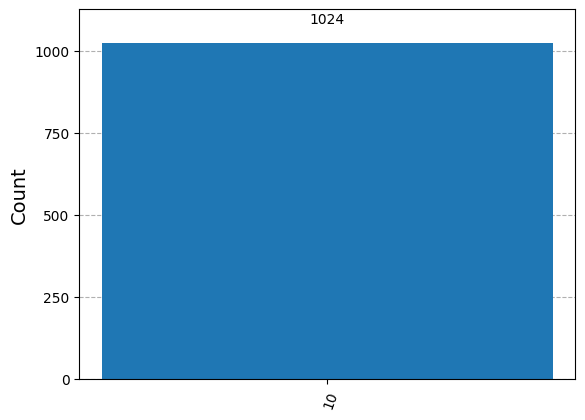

In [9]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(f"message was '{message}' -> the measurement result is {counts}")
plot_histogram(counts)